In [2]:
# imports
import requests
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt

In [3]:
# states
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
state_abrev = {v: k for k, v in states.items()}
print(state_abrev)

{'Alaska': 'AK', 'Alabama': 'AL', 'Arkansas': 'AR', 'Arizona': 'AZ', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'District of Columbia': 'DC', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Iowa': 'IA', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Massachusetts': 'MA', 'Maryland': 'MD', 'Maine': 'ME', 'Michigan': 'MI', 'Minnesota': 'MN', 'Missouri': 'MO', 'Mississippi': 'MS', 'Montana': 'MT', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Nebraska': 'NE', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'Nevada': 'NV', 'New York': 'NY', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Virginia': 'VA', 'Vermont': 'VT', 'Washington': 'WA', 'Wisconsin': 'WI', 'West Virginia': 'WV', 'Wyoming': 'WY'}


In [4]:
# read in cities 
# with open(<filename>, 'r') as fr: 
with open('../data/Census_City100-Copy1.csv', 'r') as fr:
    reader = csv.reader(fr)
    lines = []
    for line in reader:
        lines.append(line)

cities=[]
for idx, x in enumerate(lines):
    if idx == 0:
        continue
    abrev = state_abrev[x[2][1:len(x[2])]]
    tmp_name = x[1] + ', ' + abrev
    cities.append(tmp_name)

# cities = cities[1:len(cities)]
print(cities)
# print(lines[2][1])
    

['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Philadelphia, PA', 'San Antonio, TX', 'San Diego, CA', 'Dallas, TX', 'San Jose, CA', 'Austin, TX', 'Jacksonville, FL', 'Fort Worth, TX', 'Columbus, OH', 'Indianapolis, IN', 'Charlotte, NC', 'San Francisco, CA', 'Seattle, WA', 'Denver, CO', 'Oklahoma, OK', 'Nashville, TN', 'El Paso, TX', 'Washington, DC', 'Boston, MA', 'Las Vegas, NV', 'Portland, OR', 'Detroit, MI', 'Louisville, KY', 'Memphis, TN', 'Baltimore, MD', 'Milwaukee, WI', 'Albuquerque, NM', 'Fresno, CA', 'Tucson, AZ', 'Sacramento, CA', 'Mesa, AZ', 'Kansas, MO', 'Atlanta, GA', 'Omaha, NE', 'Colorado Springs, CO', 'Raleigh, NC', 'Virginia Beach, VA', 'Long Beach, CA', 'Miami, FL', 'Oakland, CA', 'Minneapolis, MN', 'Tulsa, OK', 'Bakersfield, CA', 'Wichita, KS', 'Arlington, TX', 'Aurora, CO', 'Tampa, FL', 'New Orleans, LA', 'Cleveland, OH', 'Anaheim, CA', 'Urban Honolulu CDP, HI', 'Henderson, NV', 'Stockton, CA', 'Lexington-Fayette urban county, KY',

In [5]:
# make api requests & get data
google_api_key = "385d42a61ed0f0d2baf0c09ec5e206d0bc9ba55f18baad435e7b6f079da56bce"
api_link = 'https://serpapi.com/search'

cities_params = []
for city in cities:
    tmp = {"engine": "google_shopping", "q": "Birkenstocks", "location": city, "api_key": google_api_key}
    cities_params.append(tmp)

# print(cities_params[0])    
# response = requests.get(api_link, params=cities_params[0])
# test = response.json()
# print(test['shopping_results'][0]['price'])
top_cities = cities[0:10]
top_cities_params = cities_params[0:10]

response_list= []
for param in top_cities_params:
    temp_req = requests.get(api_link, params=param)
    print(temp_req)
    response_list.append(temp_req)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [6]:
test = response_list[0].json()
test_shop = test['shopping_results'][0]
print(test_shop.keys())

dict_keys(['position', 'title', 'link', 'product_link', 'product_id', 'serpapi_product_api', 'number_of_comparisons', 'comparison_link', 'serpapi_product_api_comparisons', 'source', 'price', 'extracted_price', 'rating', 'reviews', 'badge', 'thumbnail', 'delivery', 'store_rating', 'store_reviews'])


In [10]:
# pull out data I want 
data_dict = {'City': [], 'Price': [], 'Rating': [], 'Review': []}

# print(test['shopping_results'][0]['price'])
for idx, response in enumerate(response_list):
    city = top_cities[idx]
    # print(response)
    tmp_res = response.json()
    shopping_res = tmp_res['shopping_results']
    for result in shopping_res:
        price = float(result['extracted_price'])
#         print(result)
        try:
            rating = float(result['rating'])
            review = int(result['reviews'])
            data_dict['City'].append(city)
            data_dict['Price'].append(price)
            data_dict['Rating'].append(rating)
            data_dict['Review'].append(review)
        except:
            print('No rating found')
        
print(len(data_dict['Price']))
    

No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No rating found
No ratin

In [11]:
# make pandas dataframe
data_df = pd.DataFrame.from_dict(data_dict)
data_df

,City,Price,Rating,Review
0,"New York, NY",49.99,4.6,14162
1,"New York, NY",59.95,4.7,151
2,"New York, NY",59.95,4.6,196
3,"New York, NY",59.95,4.8,16
4,"New York, NY",24.75,4.8,8
...,...,...,...,...
521,"San Jose, CA",50.00,4.5,6459
522,"San Jose, CA",99.00,4.7,71
523,"San Jose, CA",74.96,4.7,38
524,"San Jose, CA",47.00,4.7,151


In [12]:
# potentially more data cleanup
trying = data_df[data_df['City'] =='New York, NY']
trying
city_df_list = []


for new in top_cities:
    city_df_list.append(data_df[data_df['City']== new])

In [13]:
# try finding mean and median pricing from each city 
for new_city in city_df_list:
    print(new_city.mean()['Price'])
    

91.38479166666666
110.19830508474575
84.35339622641507
94.19020408163264
93.74039215686275
83.90629629629626
102.90326530612242
86.84464285714283
87.68211538461536
80.37909090909088


/var/folders/q0/606p376d14bgzh_jh8lgxxq80000gn/T/ipykernel_22811/2618655270.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(new_city.mean()['Price'])


In [14]:
# plotting data
prices_lol = []
ratings_lol = []
reviews_lol = []

for idxa, a in enumerate(city_df_list):
    prices_lol.append(city_df_list[idxa]['Price'].tolist())
    ratings_lol.append(city_df_list[idxa]['Rating'].tolist())
    reviews_lol.append(city_df_list[idxa]['Review'].tolist())


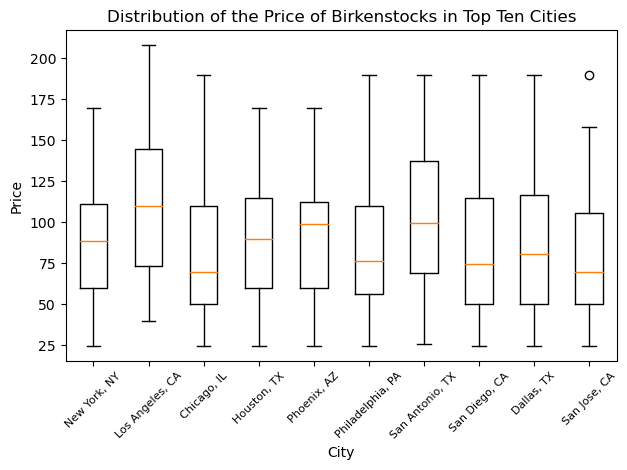

In [15]:
figure1 = plt.figure()
# temp = city_df_list[0]['Price'].tolist()

plt.boxplot(prices_lol,labels=top_cities)
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Distribution of the Price of Birkenstocks in Top Ten Cities')
plt.tight_layout()
plt.savefig('price_birks.png')
plt.show()

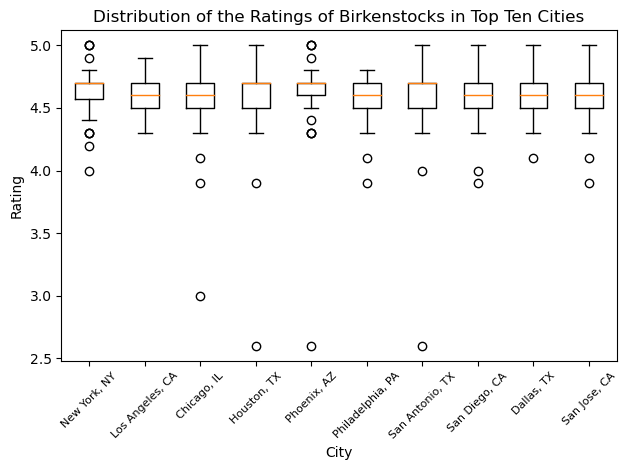

In [16]:
figure2 = plt.figure()
# temp = city_df_list[0]['Price'].tolist()

plt.boxplot(ratings_lol,labels=top_cities)
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Distribution of the Ratings of Birkenstocks in Top Ten Cities')
plt.tight_layout()
plt.savefig('rating_birks.png')
plt.show()

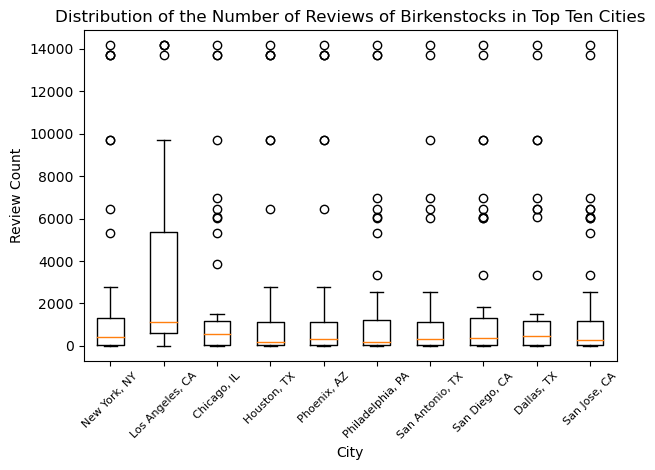

In [18]:
figure3 = plt.figure()
# temp = city_df_list[0]['Price'].tolist()

plt.boxplot(reviews_lol,labels=top_cities)
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('City')
plt.ylabel('Review Count')
plt.title('Distribution of the Number of Reviews of Birkenstocks in Top Ten Cities')
plt.tight_layout()
plt.savefig('review_birks.png')
plt.show()